<a href="https://colab.research.google.com/github/GGGhifaried/Kalman-Filter/blob/main/Salinan_dari_calculateKalman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from pylab import ylim, title, ylabel, xlabel
import matplotlib.pyplot as plt
from kalman import SingleStateKalmanFilter

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("datagps.txt",sep=",")


In [7]:
nilaiFix = np.full((1,len(df.Latitude)),-7.355481)
nilaiFix1 = np.full((1,len(df.Latitude)),112.774268)

In [8]:
df1 = pd.DataFrame({"fixLatitude":nilaiFix[0,:]})

In [9]:
df2 = pd.DataFrame({"fixLongitude":nilaiFix1[0,:]})

In [10]:
df = pd.concat([df,df1,df2],axis=1)

In [11]:
pdata = len(df.Latitude)

In [12]:
A = 1  # No process innovation
C = 1  # Measurement
B = 0  # No control input
Q = 0.000001 # Process covariance
R = 1  # Measurement covariance
x = -7.355475  # Initial estimate
P = 1  # Initial covariance

In [13]:
kalman_filter = SingleStateKalmanFilter(A, B, C, x, P, Q, R)
kalman_estimasi = []

In [14]:
df.reset_index(drop=True,inplace=True)

In [15]:
for i in range(pdata):
    kalman_filter.step(0,df["Latitude"][i])
    kalman_estimasi.append(kalman_filter.current_state())

In [16]:
df.head()

,Latitude,Longitude,fixLatitude,fixLongitude
0,-7.355488,112.774273,-7.355481,112.774268
1,-7.355489,112.774277,-7.355481,112.774268
2,-7.355489,112.774277,-7.355481,112.774268
3,-7.355489,112.774277,-7.355481,112.774268
4,-7.355489,112.774277,-7.355481,112.774268


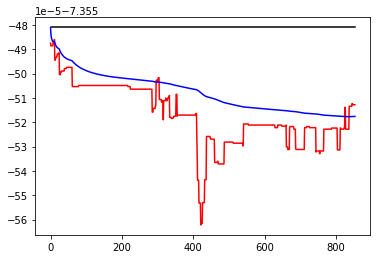

In [17]:
plt.plot(df.Latitude,'r')
plt.plot(df.fixLatitude,"k")
plt.plot(kalman_estimasi,"b")
plt.show()

In [18]:
A = 1  # No process innovation
C = 1  # Measurement
B = 0  # No control input
Q = 0.000001 # Process covariance
R = 1  # Measurement covariance
x = 112.774277  # Initial estimate
P = 1  # Initial covariance
kalman_filter_long = SingleStateKalmanFilter(A, B, C, x, P, Q, R)
kalman_estimasi_long = []
for i in range(pdata):
    kalman_filter_long.step(0,df["Longitude"][i])
    kalman_estimasi_long.append(kalman_filter_long.current_state())


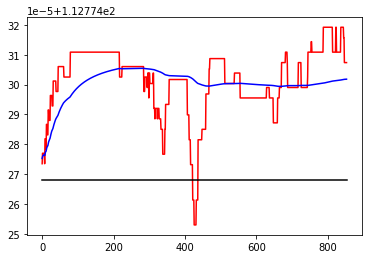

In [19]:
plt.plot(df.Longitude,'r')
plt.plot(df.fixLongitude,"k")
plt.plot(kalman_estimasi_long,"b")
plt.show()

In [20]:
df["kalmanLongitude"]=kalman_estimasi_long

In [21]:
df["kalmanLatitude"]=kalman_estimasi

In [22]:
df.describe()

,Latitude,Longitude,fixLatitude,fixLongitude,kalmanLongitude,kalmanLatitude
count,854.000000,854.000000,8.540000e+02,8.540000e+02,854.000000,854.000000
mean,-7.355517,112.774302,-7.355481e+00,1.127743e+02,112.774300,-7.355508
std,0.000013,0.000011,8.886989e-16,1.421918e-14,0.000005,0.000008
min,-7.355562,112.774253,-7.355481e+00,1.127743e+02,112.774275,-7.355518
25%,-7.355523,112.774296,-7.355481e+00,1.127743e+02,112.774300,-7.355515
50%,-7.355518,112.774303,-7.355481e+00,1.127743e+02,112.774300,-7.355509
75%,-7.355505,112.774311,-7.355481e+00,1.127743e+02,112.774303,-7.355502
max,-7.355486,112.774319,-7.355481e+00,1.127743e+02,112.774305,-7.355481
